<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/28.04.2024/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)


# label getter function
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'


#dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func = label_getter,
                                              codes=np.loadtxt(path/'codes.txt', dtype=str))

#fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 150MB/s]


epoch,train_loss,valid_loss,time
0,2.732861,2.441750,00:02


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,time
0,1.758978,1.580968,00:01
1,1.500452,1.301369,00:01
2,1.378119,1.264168,00:01
3,1.302099,1.159779,00:01
4,1.187683,1.031738,00:01
5,1.070413,0.935778,00:01
6,0.967126,0.886411,00:01
7,0.879421,0.843852,00:01
8,0.804985,0.850061,00:01
9,0.742393,0.850357,00:01


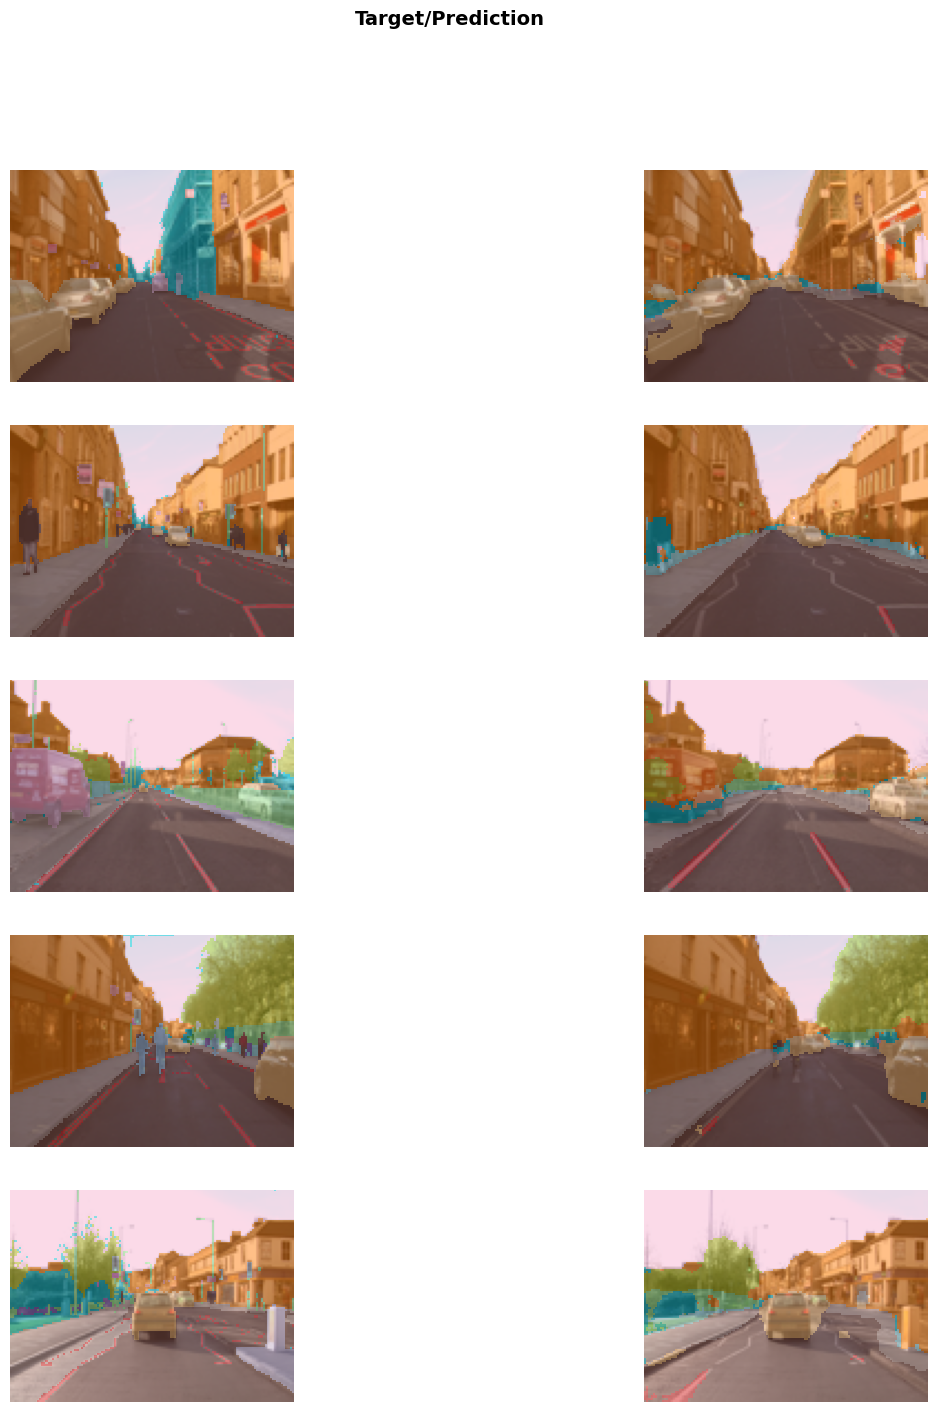

In [2]:
learn.show_results(max_n=5, figsize=(15,16))